## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) is one of the most popular optimization algorithm in machine learning.
In SGD true gradient is approximated by gradient at a single example. This makes the method very fast and powerful.
In this sheet we will use SGD and batch gradient descent to solve a logistic regression problem.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [2]:
#Load the iris dataset
s = os.path.join('https://archive.ics.uci.edu','ml',
                 'machine-learning-databases',
                 'iris','iris.data')

In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [4]:
#Select sentos and versicolor
y = df[(df[4] == 'Iris-setosa') | (df[4] == 'Iris-versicolor')][4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df[(df[4] ==  'Iris-setosa') | (df[4] == 'Iris-versicolor')][[0,2]].values

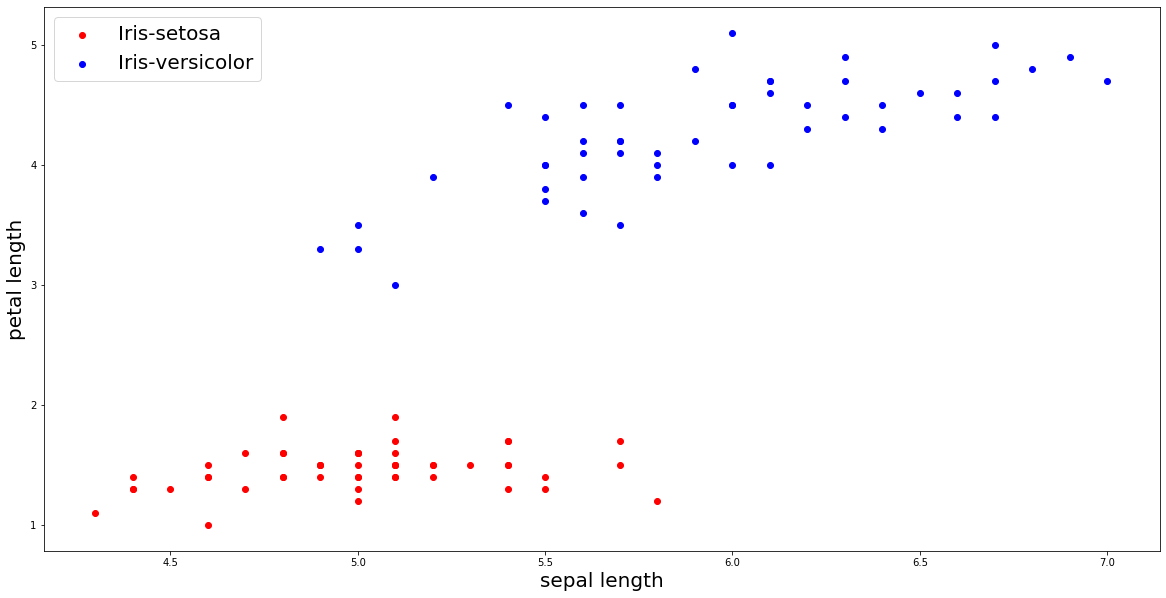

In [5]:
#Plot
plt.figure(figsize=(20,10))
plt.scatter(X[:50,0],X[:50,1], color='r', label='Iris-setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='b',label='Iris-versicolor')
plt.xlabel('sepal length', fontsize=20)
plt.ylabel('petal length', fontsize=20)
plt.legend(fontsize=20)

In [6]:
#Lets fit logistic regression to this using sklearm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(X,y)
print(f"Decision boundary x1 + {lr.coef_[0,1]/lr.coef_[0,0]:.3f}x2 = {lr.intercept_[0]/lr.coef_[0,0]:.3f}")

Decision boundary x1 + -2.144x2 = 0.334


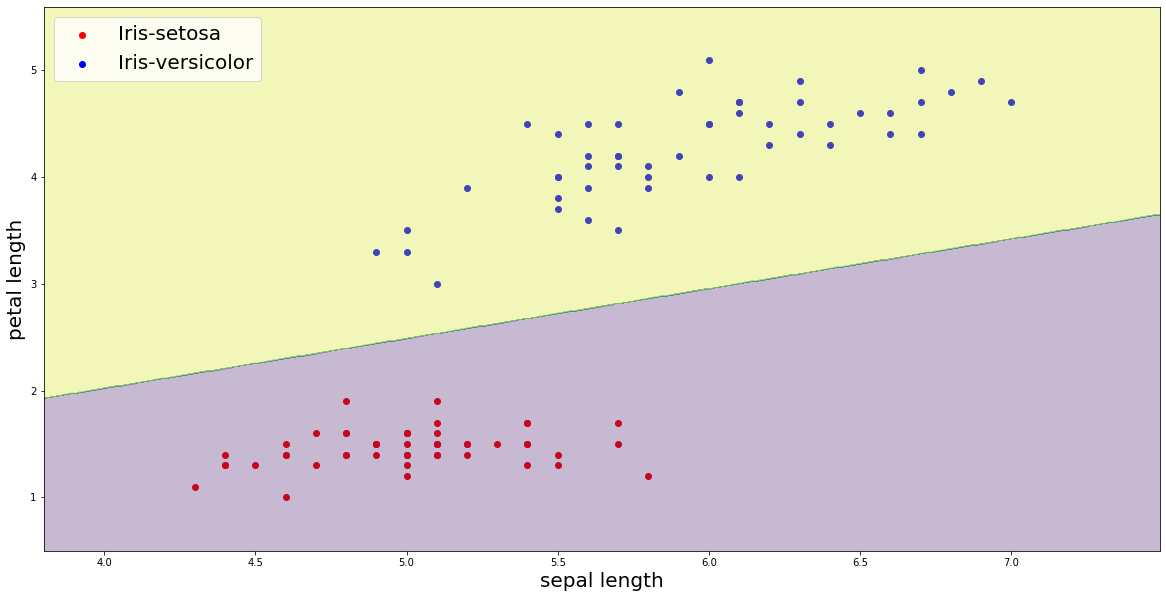

In [7]:
def plotDecisionBoundary(X, beta=None,addOnes=False):
    #Plot the decision boundary
    plt.figure(figsize=(20,10))
    plt.scatter(X[:50,0],X[:50,1], color='r', label='Iris-setosa')
    plt.scatter(X[50:100,0],X[50:100,1], color='b',label='Iris-versicolor')
    plt.xlabel('sepal length', fontsize=20)
    plt.ylabel('petal length', fontsize=20)
    plt.legend(fontsize=20)

    xx1, xx2  = np.meshgrid(np.arange(X[:,0].min()-0.5,X[:,0].max()+0.5,0.01), np.arange(X[:,1].min()-0.5,X[:,1].max()+0.5,0.01))
    X_grid = np.array([xx1.ravel(), xx2.ravel()]).T
    if addOnes:
        X_grid_w_ones = np.hstack((np.ones(shape=(X_grid.shape[0],1)),X_grid))
        Y_grid = predict(X_grid_w_ones, beta)
    else:
        Y_grid = lr.predict(X_grid)
    Y_grid = Y_grid.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Y_grid, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
plotDecisionBoundary(X)

### Batch gradient descent
Now lets use Batch gradient descent to solve the same problem.
For batch gradient descent we need the loss function and the derivative of the loss function.
Loss function for **Logistic Regression** is given as:  


$L = -\frac{1}{M}\sum_{i=1}^{M}(y_i ln(\hat{y_i})+(1-y_i) ln(1-\hat{y_i}))$ 

When the labels are $y \in \{-1,1\}$ ( as in sklearn ) then the loss function becomes:

$L = \frac{1}{M}\sum_{i=1}^{M}\text{log}(\text{exp}(-y_ix_i^T\beta)+1)$ 


Where $M$ is the number of samples. $y_i$ is the $i$th observation, $\hat{y_i}$ is the $i$th prediction given by 


$\hat{y_i} = \frac{1}{1+\text{exp}(-x_i^T\beta)}$

Gradient of Loss function with $\beta$ is given as:

$\frac{\partial L}{\partial \beta} = -\frac{1}{M} \sum_{i=1}^{M} (y_i-\hat{y_i})x_i$

In [8]:
def logistic(x, beta):
    """
    x is a matrix of dimension M*N
    beta is a column vector of dimension N*1
    where N is the number of features and M is the number of samples
    
    returns logistic function
    """
    return (1.0 / (1.0 + np.exp(-np.dot(x,beta))))


#test
x_test = np.array([[0,1,2],[2,3,4]])
beta = np.array([0, 0, 0]).reshape(3,1)
print("Logistic =", logistic(x_test, beta))

Logistic = [[0.5]
 [0.5]]


In [9]:
def cost(x, beta, y):
    """
        x is a matrix of dimension M*N
        beta is a column vector of dimension N*1
        y is a column vector of dimenstion M*1
        where N is the number of features and M is the number of samples
        
        returns cost function for this sample of x
    """
    yhat = logistic(x, beta)
    return -1 * (np.dot(y.T,np.log(yhat)) + np.dot((1- y).T,np.log(1-yhat)))

#test 
x_test = np.array([[0,1,2],[2,3,4]])
beta = np.array([0,0,0]).reshape(3,1)
y_test = np.array([1,1]).reshape(2,1)
print("Cost1 =", cost(x_test, beta, y_test))

y_test = np.array([0,0]).reshape(2,1)
print("Cost2 =", cost(x_test, beta, y_test))

y_test = np.array([0,0]).reshape(2,1)
beta = np.array([1,1,1]).reshape(3,1)
print("Cost3 =",cost(x_test, beta, y_test))

Cost1 = [[1.38629436]]
Cost2 = [[1.38629436]]
Cost3 = [[12.04871075]]


In [10]:
def loss(x, beta, y):
    return cost(x, beta, y)/x.shape[0]

#test
y_test = np.array([0,0]).reshape(2,1)
beta = np.array([0,0,0]).reshape(3,1)
print("Loss =",loss(x_test, beta, y_test))

Loss = [[0.69314718]]


In [11]:
def gradient(x, beta, y):
    """
    Gradient of the cost function
    """
    yhat = logistic(x, beta)
    return -1/y.shape[0] * np.matmul(x.T, (y-yhat))

#test 
x_test = np.array([[0,1,1],[2,3,4]])
beta = np.array([0,0,0]).reshape(3,1)
y_test = np.array([0,1]).reshape(2,1)
g = gradient(x_test, beta, y_test)

print("Gradients=",g)

Gradients= [[-0.5 ]
 [-0.5 ]
 [-0.75]]


In [12]:
def predict(x, beta):
    yhat = logistic(x, beta)
    return np.where(yhat > 0.5, 1, 0) 

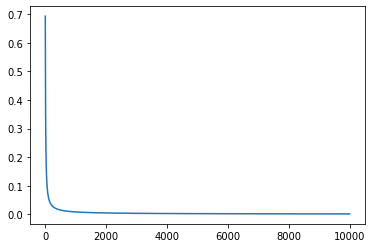

In [13]:
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
Niter = 10000
beta = np.array([0,0,0])
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
y_lr = np.where(y_lr < 0, 0, 1)
learningRate = 0.2
losses = []
for i in range(Niter):
    #calculate loss
    losses.append(loss(X_w_ones, beta, y_lr)[0,0])
    beta = beta - learningRate * gradient(X_w_ones, beta, y_lr)
plt.plot(losses)

Decision boundary x1 + -2.149x2 = 0.381


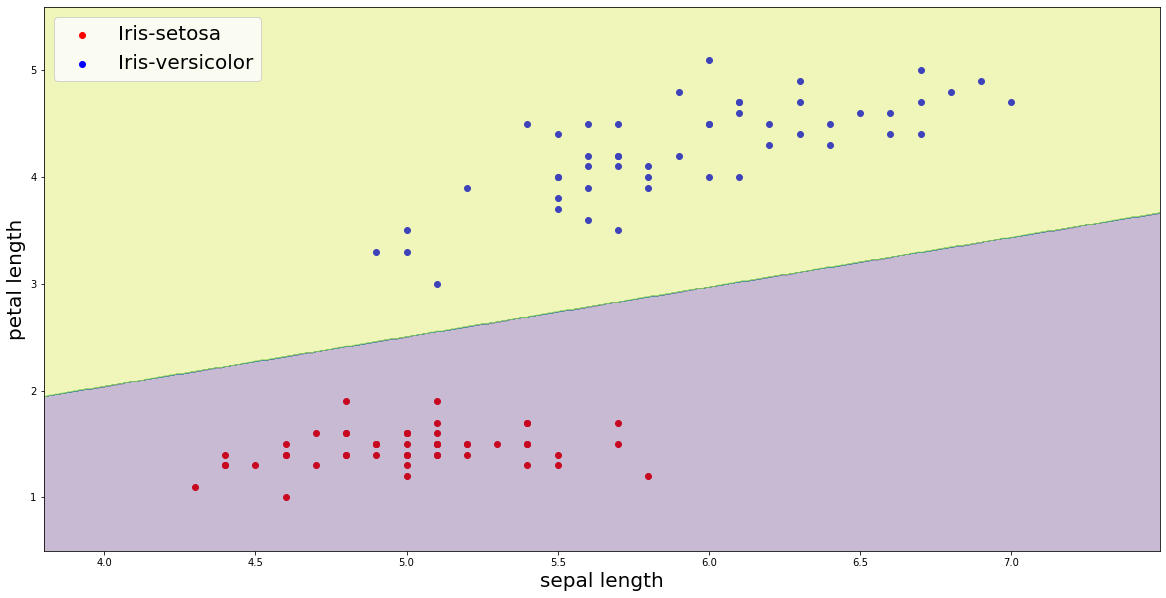

In [14]:
plotDecisionBoundary(X, beta, True)
print(f"Decision boundary x1 + {beta[2,0]/beta[1,0]:.3f}x2 = {beta[0,0]/beta[1,0]:.3f}")

The decision boundary choosen by Batch Gradient Descent is similar to one by Sklearn.

Low lets apply SGD.

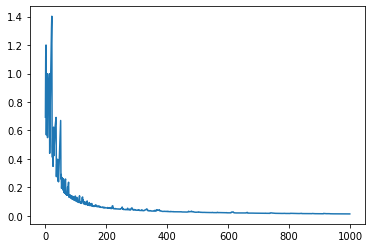

In [15]:
#SGD
np.random.seed(0)
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
NEpoch = 10
beta = np.array([0,0,0])
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
y_lr = np.where(y_lr < 0, 0, 1)
learningRate = 0.1
losses = []
for i in range(NEpoch):
    p = np.random.permutation(X_w_ones.shape[0])
    X_w_ones = X_w_ones[p]
    y_lr = y_lr[p]
    for j in range(X_w_ones.shape[0]):
        #calculate loss
        losses.append(loss(X_w_ones, beta, y_lr)[0,0])
        beta = beta - learningRate * gradient(X_w_ones[j,:].reshape(1,3), beta, y_lr[j,:].reshape(1,1))
plt.plot(losses)

Decision boundary x1 + -2.110x2 = 0.399


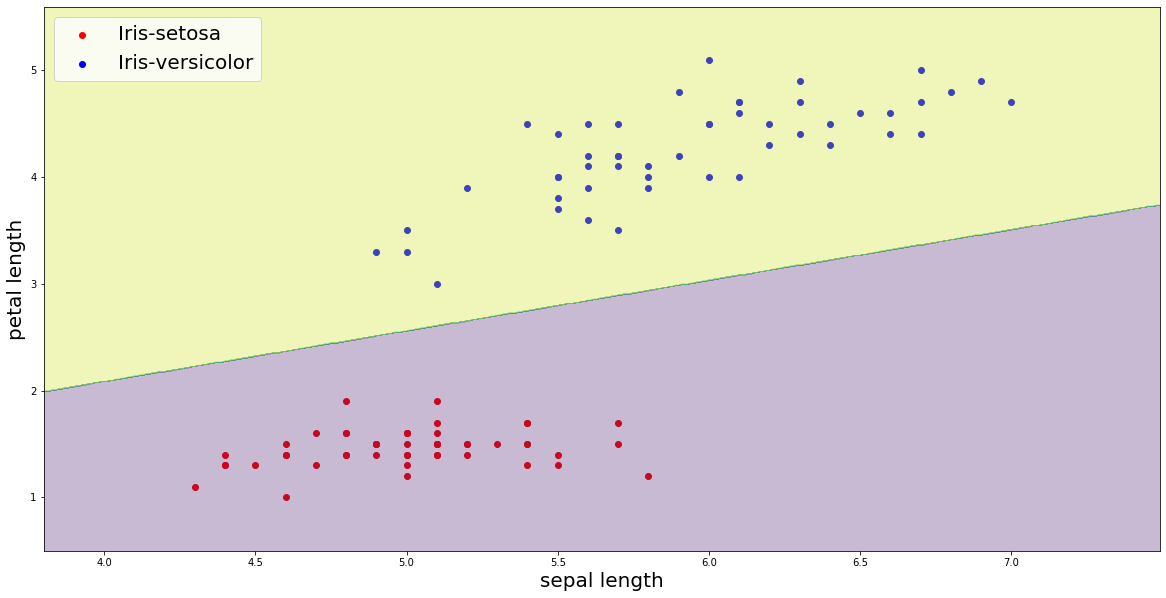

In [16]:
plotDecisionBoundary(X, beta, True)
print(f"Decision boundary x1 + {beta[2,0]/beta[1,0]:.3f}x2 = {beta[0,0]/beta[1,0]:.3f}")

We can see SGD also converges to the same solution, SGD decay of loss function is a little noisy as compared to BGD. But SGD is much more efficient than BGD.

Now lets implement **Mini Batch Gradient Descent**

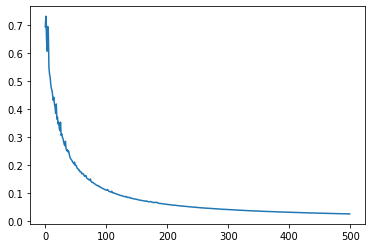

In [17]:
#Mini-Batch Gradient Descent
np.random.seed(0)
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
NEpoch = 50
beta = np.array([0,0,0])
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
y_lr = np.where(y_lr < 0, 0, 1)
learningRate = 0.1
losses = []
BatchSize = 10
for i in range(NEpoch):
    p = np.random.permutation(X_w_ones.shape[0])
    X_w_ones = X_w_ones[p]
    y_lr = y_lr[p]
    for j in range(int(X_w_ones.shape[0]/BatchSize)):
        #calculate loss
        losses.append(loss(X_w_ones, beta, y_lr)[0,0])
        startNdx = j * BatchSize
        endNdx = (j+1) * BatchSize
        beta = beta - learningRate * gradient(X_w_ones[startNdx:endNdx,:], beta, y_lr[startNdx:endNdx,:])
plt.plot(losses)

Decision boundary x1 + -2.119x2 = 0.386


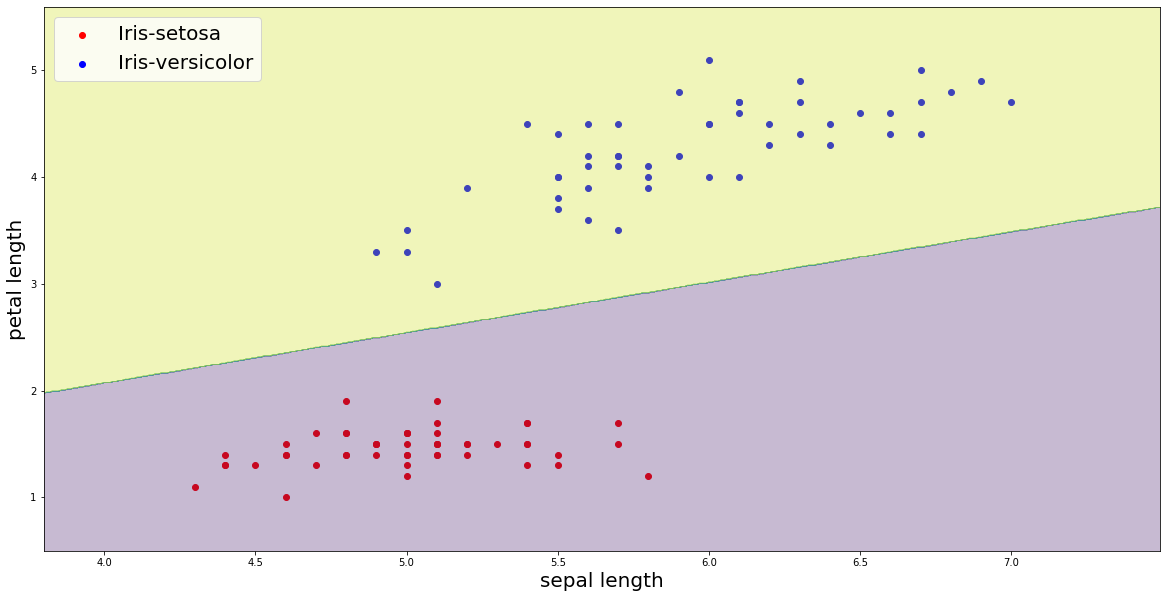

In [18]:
plotDecisionBoundary(X, beta, True)
print(f"Decision boundary x1 + {beta[2,0]/beta[1,0]:.3f}x2 = {beta[0,0]/beta[1,0]:.3f}")

Mini-Batch Gradient Descent also matched SGD and Batch Gradient Descent.